<a href="https://colab.research.google.com/github/Andrii-Oliinyk-2726/Data_Science_HW9/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

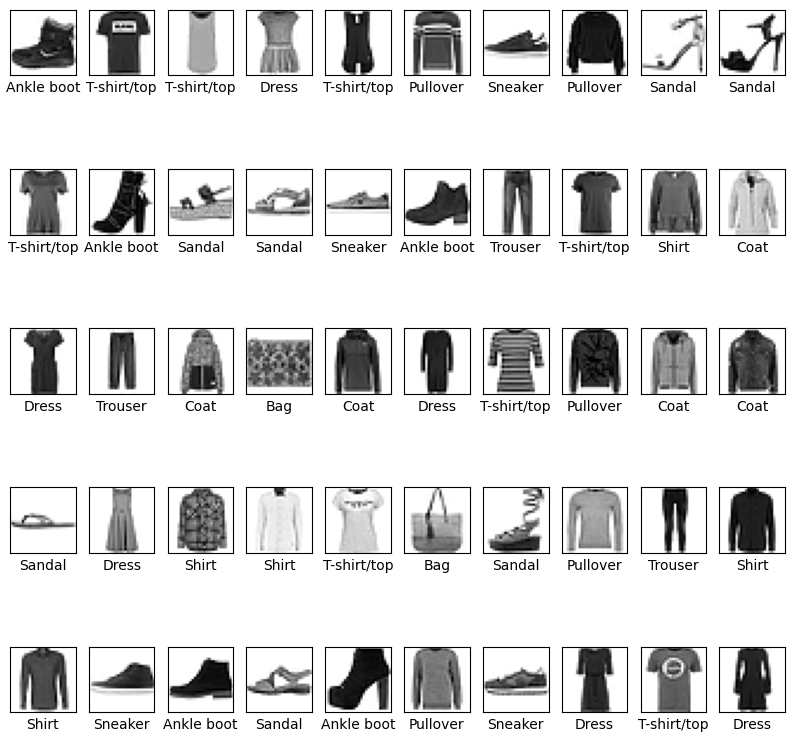

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [39]:
num_classes = 10
num_features = 28 * 28 * 1
learning_rate = 0.001
batch_size = 256
epochs = 80


x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/80
234/234 [==============================] - 21s 83ms/step - loss: 0.7550 - accuracy: 0.7171 - val_loss: 0.4587 - val_accuracy: 0.8321 - lr: 0.0010
Epoch 2/80
234/234 [==============================] - 18s 76ms/step - loss: 0.4849 - accuracy: 0.8256 - val_loss: 0.4185 - val_accuracy: 0.8489 - lr: 0.0010
Epoch 3/80
234/234 [==============================] - 21s 88ms/step - loss: 0.4469 - accuracy: 0.8395 - val_loss: 0.3982 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 4/80
234/234 [==============================] - 18s 78ms/step - loss: 0.4244 - accuracy: 0.8488 - val_loss: 0.3824 - val_accuracy: 0.8627 - lr: 0.0010
Epoch 5/80
234/234 [==============================] - 19s 81ms/step - loss: 0.4045 - accuracy: 0.8560 - val_loss: 0.3846 - val_accuracy: 0.8605 - lr: 0.0010
Epoch 6/80
234/234 [==============================] - 18s 75ms/step - loss: 0.3911 - accuracy: 0.8614 - val_loss: 0.3745 - val_accuracy: 0.8627 - lr: 0.0010
Epoch 7/80
234/234 [==============================] - 18s 

In [40]:
# оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 2))

313/313 [==============================] - 4s 11ms/step - loss: 0.3195 - accuracy: 0.9038
Доля верных ответов на тестовых данных, в процентах: 90.38


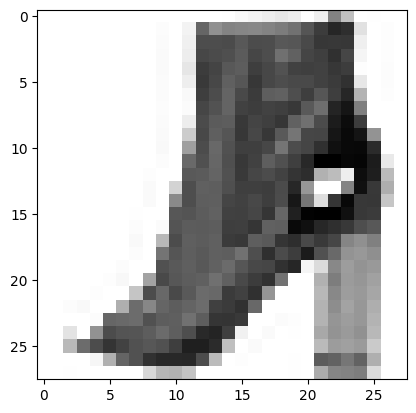

In [42]:
n_rec = 495
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [44]:
#Поменяем размер, нормализуем
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
#Распознаем
prediction = model.predict(x)

1/1 [==============================] - 0s 124ms/step


In [45]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", class_names[prediction])

Номер класса: 9
Название класса: Ankle boot
